In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("leaderboards_7308448.csv")

In [3]:
df.head()

,athlete_name,rank,athlete_gender,start_date_local,distance,average_watts,moving_time,elapsed_time,average_hr
0,The Todd,1,M,2015-03-29T15:24:15Z,489.1,NaN,20,20,NaN
1,Steve G,2,M,2011-10-11T18:35:58Z,449.4,521.0,33,33,185.5
2,Peter Cracknell,2,M,2012-05-06T13:39:11Z,491.8,572.2,33,33,NaN
3,Thomas De Gendt,2,M,2013-05-18T23:35:53Z,492.2,471.7,33,33,166.0
4,Jason Lokkesmoe,2,M,2013-08-26T17:11:58Z,426.9,508.1,33,33,NaN


In [4]:
df.describe()

,rank,distance,average_watts,moving_time,elapsed_time,average_hr
count,22853.000000,22853.000000,19526.000000,22853.000000,22853.000000,5836.000000
mean,11144.013084,487.918050,188.894397,62.172100,62.865182,141.774760
std,6657.494442,20.064151,76.938817,14.777227,22.609242,22.359717
min,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,5336.000000,483.500000,135.900000,53.000000,53.000000,128.600000
50%,11261.000000,490.400000,178.950000,60.000000,60.000000,143.150000
75%,16966.000000,496.500000,229.900000,68.000000,68.000000,157.000000
max,22875.000000,772.300000,966.500000,352.000000,1187.000000,226.200000


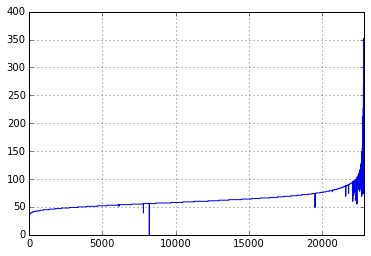

In [5]:
plt.figure();
df['moving_time'].plot()

In [6]:
df["speed"] = (df["distance"] / (1609.344 * df["moving_time"])) * 3600

In [7]:
df[0:10]

,athlete_name,rank,athlete_gender,start_date_local,distance,average_watts,moving_time,elapsed_time,average_hr,speed
0,The Todd,1,M,2015-03-29T15:24:15Z,489.1,NaN,20,20,NaN,54.704277
1,Steve G,2,M,2011-10-11T18:35:58Z,449.4,521.0,33,33,185.5,30.463005
2,Peter Cracknell,2,M,2012-05-06T13:39:11Z,491.8,572.2,33,33,NaN,33.337129
3,Thomas De Gendt,2,M,2013-05-18T23:35:53Z,492.2,471.7,33,33,166.0,33.364244
4,Jason Lokkesmoe,2,M,2013-08-26T17:11:58Z,426.9,508.1,33,33,NaN,28.937821
5,Scott Harrington,6,M,2009-11-26T22:31:48Z,399.2,NaN,34,34,NaN,26.264264
6,Bruce Prescott,6,M,2011-02-21T10:07:51Z,417.6,300.8,34,34,NaN,27.474841
7,Ben Jacques-Maynes,6,M,2013-05-19T08:35:55Z,461.7,502.2,34,34,NaN,30.376279
8,James Stemper,6,M,2013-05-19T08:35:54Z,480.2,554.1,34,34,NaN,31.593436
9,Fred Haise,6,M,2013-05-19T08:35:59Z,462.4,548.0,34,34,NaN,30.422334


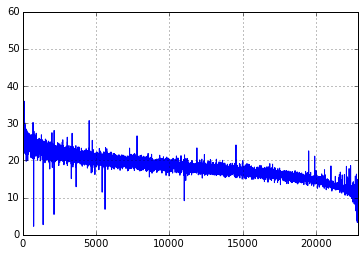

In [8]:
df['speed'].plot()

In [9]:
df["male"] = np.where(df['athlete_gender']=='M', 1, 0)
df[0:10]

,athlete_name,rank,athlete_gender,start_date_local,distance,average_watts,moving_time,elapsed_time,average_hr,speed,male
0,The Todd,1,M,2015-03-29T15:24:15Z,489.1,NaN,20,20,NaN,54.704277,1
1,Steve G,2,M,2011-10-11T18:35:58Z,449.4,521.0,33,33,185.5,30.463005,1
2,Peter Cracknell,2,M,2012-05-06T13:39:11Z,491.8,572.2,33,33,NaN,33.337129,1
3,Thomas De Gendt,2,M,2013-05-18T23:35:53Z,492.2,471.7,33,33,166.0,33.364244,1
4,Jason Lokkesmoe,2,M,2013-08-26T17:11:58Z,426.9,508.1,33,33,NaN,28.937821,1
5,Scott Harrington,6,M,2009-11-26T22:31:48Z,399.2,NaN,34,34,NaN,26.264264,1
6,Bruce Prescott,6,M,2011-02-21T10:07:51Z,417.6,300.8,34,34,NaN,27.474841,1
7,Ben Jacques-Maynes,6,M,2013-05-19T08:35:55Z,461.7,502.2,34,34,NaN,30.376279,1
8,James Stemper,6,M,2013-05-19T08:35:54Z,480.2,554.1,34,34,NaN,31.593436,1
9,Fred Haise,6,M,2013-05-19T08:35:59Z,462.4,548.0,34,34,NaN,30.422334,1


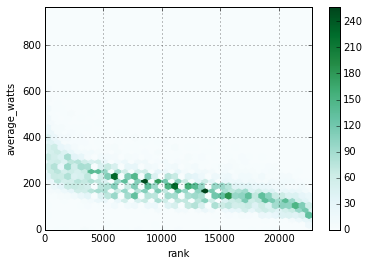

In [10]:
df.plot(kind="hexbin", x="rank", y="average_watts", gridsize=40)

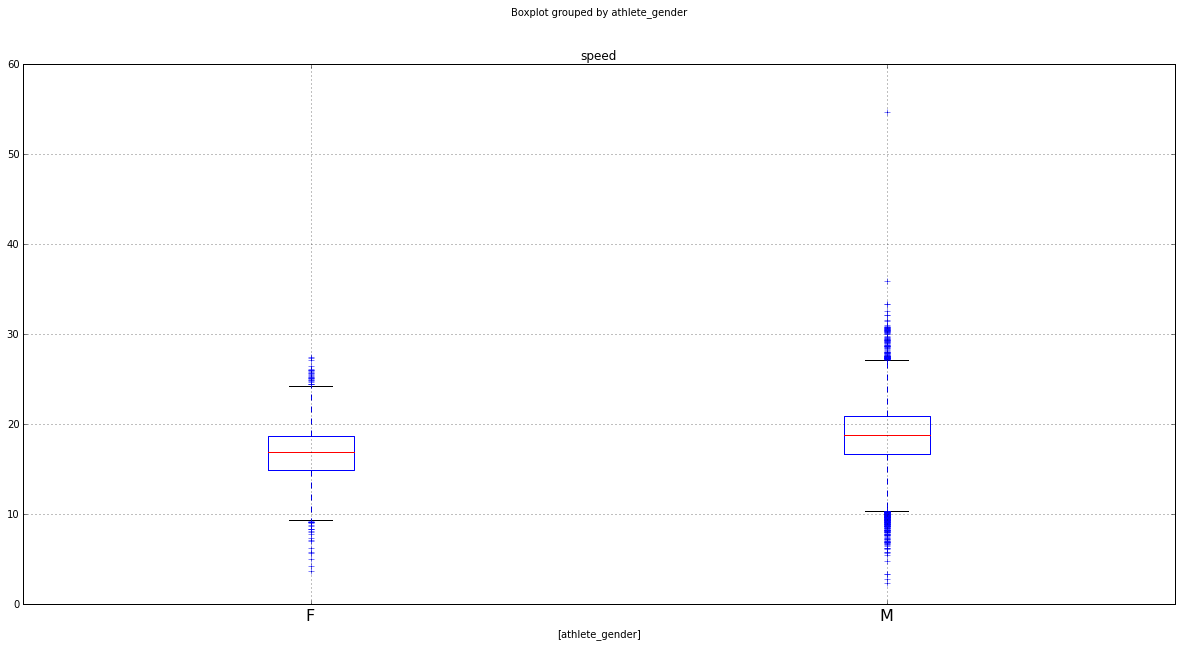

In [11]:
df1 = df[["athlete_gender","speed"]].boxplot(by="athlete_gender", fontsize=16, figsize=(20,10))

In [12]:
df1 = df[["distance", "moving_time"]].values
df1

array([[ 489.1,   20. ],
       [ 449.4,   33. ],
       [ 491.8,   33. ],
       ..., 
       [ 530.6,  130. ],
       [ 517.6,  148. ],
       [ 772.3,  116. ]])

In [13]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

###############################################################################
# Generate sample data
X, _ = make_blobs(n_samples=500, n_features=2, centers=df1, cluster_std=0.6)

###############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("@@@ Number of estimated clusters : %d" % n_clusters_)


@@@ Number of estimated clusters : 6


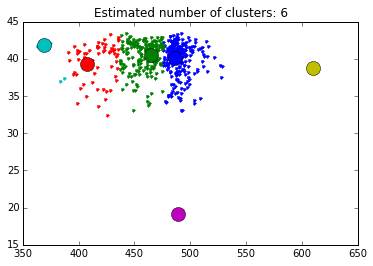

In [14]:
###############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()